In [32]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [33]:
pip install opencv-python

  Using cached numpy-2.2.6-cp312-cp312-macosx_14_0_arm64.whl.metadata (62 kB)
Using cached numpy-2.2.6-cp312-cp312-macosx_14_0_arm64.whl (5.1 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.6 which is incompatible.
contourpy 1.2.0 requires numpy<2.0,>=1.20, but you have numpy 2.2.6 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.6 which is incompatible.
tensorflow 2.19.0 requires numpy<2.2.0,>=1.26.0, but you have numpy 2.2.6 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [34]:
pip install --upgrade matplotlib


  Using cached numpy-1.26.4-cp312-cp312-macosx_11_0_arm64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp312-cp312-macosx_11_0_arm64.whl (13.7 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.6
    Uninstalling numpy-2.2.6:
      Successfully uninstalled numpy-2.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [35]:
import numpy as np
import matplotlib.pyplot as plt
import os
from pathlib import Path
import cv2

In [36]:
# Define paths using absolute paths
# Change directory accordingly
TRAIN_DIR = "/Users/hachitran/Desktop/1. School/1. FAU/Courses/2025/Fall 2025/CAP 4630/archive/clouds_train"
TEST_DIR = "/Users/hachitran/Desktop/1. School/1. FAU/Courses/2025/Fall 2025/CAP 4630/archive/clouds_test"

In [37]:
# Get all class folder names
train_path = Path(TRAIN_DIR)
class_names = sorted([d.name for d in train_path.iterdir() if d.is_dir()])

# Define image size (adjust if needed)
IMG_WIDTH = 224
IMG_HEIGHT = 224

# Lists to store images and labels
images = []
labels = []

# Load images from each class folder
for class_idx, class_name in enumerate(class_names):
    class_folder = train_path / class_name
    
    # Get all .jpg files in this class folder
    image_files = list(class_folder.glob("*.jpg"))
    
    print(f"\nLoading {class_name}...")
    
    for img_file in image_files:
        # Read image with OpenCV
        img = cv2.imread(str(img_file))
        
        if img is not None:
            # Convert BGR to RGB
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            
            # Resize to consistent size
            img_resized = cv2.resize(img_rgb, (IMG_WIDTH, IMG_HEIGHT))
            
            images.append(img_resized)
            labels.append(class_idx)

# Convert to numpy arrays
images_array = np.array(images)
labels_array = np.array(labels)

print(f"\n✓ Loaded {len(images_array)} images total")
print(f"✓ Image shape: {images_array[0].shape}")
print(f"✓ Labels shape: {labels_array.shape}")



Loading cirriform clouds...

Loading clear sky...

Loading cumulonimbus clouds...

Loading cumulus clouds...

Loading high cumuliform clouds...

Loading stratiform clouds...

Loading stratocumulus clouds...

✓ Loaded 474 images total
✓ Image shape: (224, 224, 3)
✓ Labels shape: (474,)


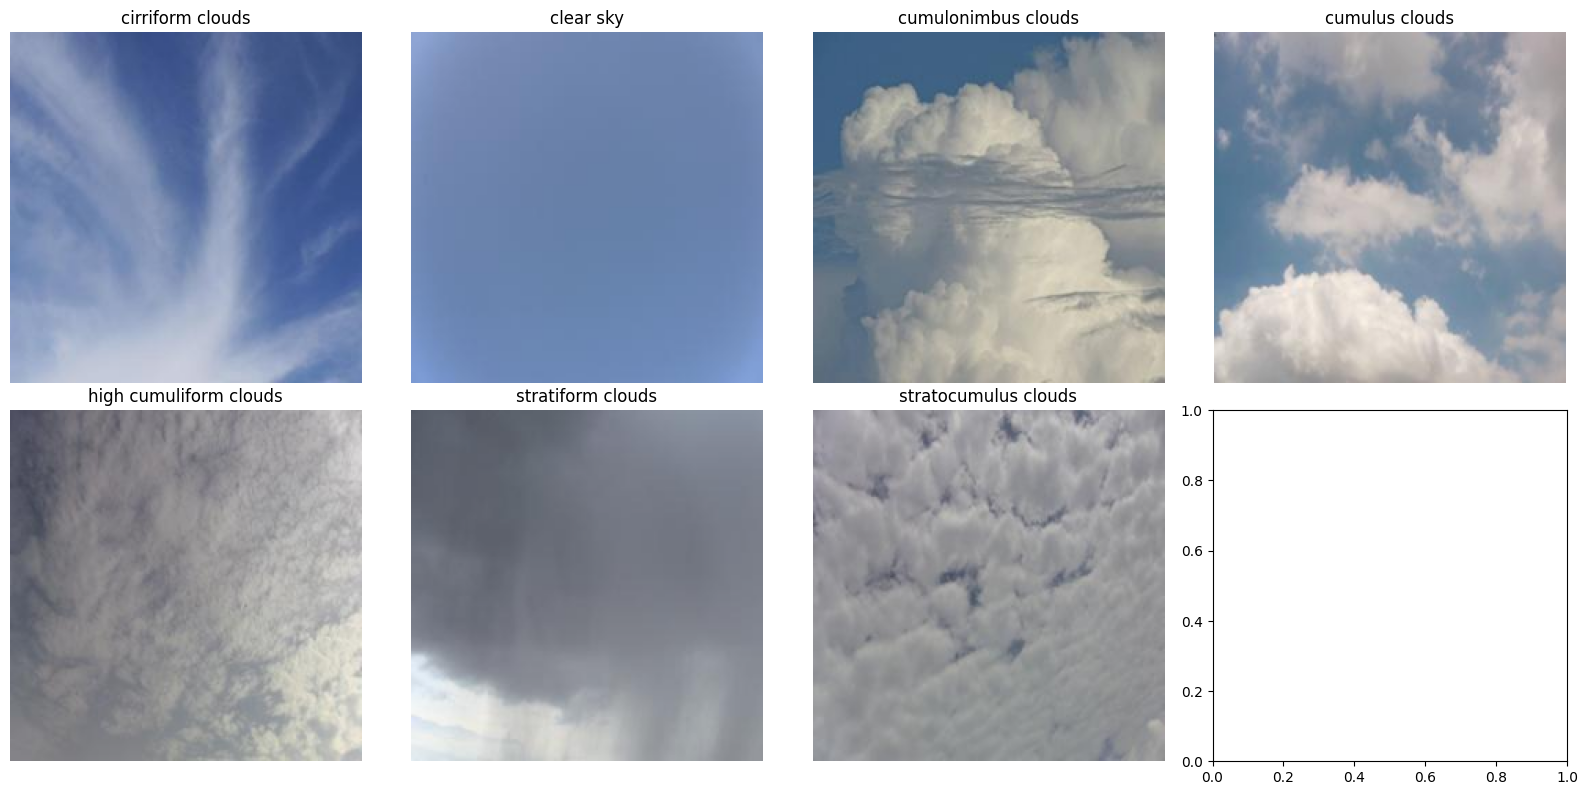

In [38]:
# Show random sample images from each class
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.ravel()

# Set random seed for reproducibility
np.random.seed(42)

sample_idx = 0
for class_idx, class_name in enumerate(class_names):
    # Find random image of this class
    indices = np.where(labels_array == class_idx)[0]
    if len(indices) > 0:
        # Pick a random image from this class
        img_idx = np.random.choice(indices)
        axes[sample_idx].imshow(images_array[img_idx])
        axes[sample_idx].set_title(f"{class_name}")
        axes[sample_idx].axis('off')
        sample_idx += 1

plt.tight_layout()
plt.show()


In [39]:
# Normalize pixel values to [0, 1]
images_normalized = images_array / 255.0

print(f"Pixel values range: [{images_normalized.min():.2f}, {images_normalized.max():.2f}]")


Pixel values range: [0.00, 1.00]


In [40]:
# Split data into training and validation sets - RYAN done by 11/16/2025
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    images_normalized, labels_array, test_size=0.2, random_state=42, stratify=labels_array
)

print(f"Training set: {len(X_train)} images")
print(f"Validation set: {len(X_val)} images")
print(f"Total: {len(X_train) + len(X_val)} images")
print(f"\nTraining set shape: {X_train.shape}")
print(f"\nValidation set shape: {X_val.shape}")

# Check class distribution in both sets
print("\n")
print("Training set:")
for class_idx, class_name in enumerate(class_names):
    count = np.sum(y_train == class_idx)
    percentage = (count / len(y_train)) * 100
    print(f"  {class_name}: {count} ({percentage:.1f}%)")

print("\nValidation set:")
for class_idx, class_name in enumerate(class_names):
    count = np.sum(y_val == class_idx)
    percentage = (count / len(y_val)) * 100
    print(f"  {class_name}: {count} ({percentage:.1f}%)")

Training set: 379 images
Validation set: 95 images
Total: 474 images

Training set shape: (379, 224, 224, 3)

Validation set shape: (95, 224, 224, 3)


Training set:
  cirriform clouds: 53 (14.0%)
  clear sky: 48 (12.7%)
  cumulonimbus clouds: 11 (2.9%)
  cumulus clouds: 73 (19.3%)
  high cumuliform clouds: 106 (28.0%)
  stratiform clouds: 39 (10.3%)
  stratocumulus clouds: 49 (12.9%)

Validation set:
  cirriform clouds: 13 (13.7%)
  clear sky: 12 (12.6%)
  cumulonimbus clouds: 3 (3.2%)
  cumulus clouds: 18 (18.9%)
  high cumuliform clouds: 27 (28.4%)
  stratiform clouds: 10 (10.5%)
  stratocumulus clouds: 12 (12.6%)


In [41]:
# Building CNN model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Input(shape=(IMG_WIDTH, IMG_HEIGHT, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(class_names), activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))


Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 355ms/step - accuracy: 0.2238 - loss: 7.6049 - val_accuracy: 0.3474 - val_loss: 1.8149
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 332ms/step - accuracy: 0.3318 - loss: 1.7368 - val_accuracy: 0.4211 - val_loss: 1.4031
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 325ms/step - accuracy: 0.3848 - loss: 1.3749 - val_accuracy: 0.4421 - val_loss: 1.3067
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 305ms/step - accuracy: 0.4740 - loss: 1.2629 - val_accuracy: 0.4105 - val_loss: 1.2902
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 297ms/step - accuracy: 0.4574 - loss: 1.2107 - val_accuracy: 0.5789 - val_loss: 1.2327
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 305ms/step - accuracy: 0.4846 - loss: 1.2322 - val_accuracy: 0.4421 - val_loss: 1.3028
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 300ms/step - accuracy: 0.4705 - loss: 1.1827 - val_accuracy: 0.4842 - val_loss: 1.2393
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 299ms/step - accuracy: 0.5588 - loss: 1.1254 - val_accuracy: 0.

In [42]:
# Load and preprocess test data - RYAN done by 11/16/2025
test_path = Path(TEST_DIR)

# Lists to store test images and labels
test_images = []
test_labels = []

# Load images from each class folder in test directory
for class_idx, class_name in enumerate(class_names):
    class_folder = test_path / class_name
    
    # Get all .jpg files in this class folder
    image_files = list(class_folder.glob("*.jpg"))
    
    print(f"\nLoading test {class_name}...")
    
    for img_file in image_files:
        # Read image with OpenCV
        img = cv2.imread(str(img_file))
        
        if img is not None:
            # Convert BGR to RGB
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            
            # Resize to consistent size (same as training)
            img_resized = cv2.resize(img_rgb, (IMG_WIDTH, IMG_HEIGHT))
            
            test_images.append(img_resized)
            test_labels.append(class_idx)

# Convert to numpy arrays
test_images_array = np.array(test_images)
test_labels_array = np.array(test_labels)

# Normalize pixel values to [0, 1] (same as training data)
test_images_array = test_images_array / 255.0

print(f"\n✓ Loaded {len(test_images_array)} test images total")
print(f"✓ Test image shape: {test_images_array[0].shape}")
print(f"✓ Test labels shape: {test_labels_array.shape}")
print(f"✓ Pixel values range: [{test_images_array.min():.2f}, {test_images_array.max():.2f}]")

# Check class distribution in test set
print("\nTest set class distribution:")
for class_idx, class_name in enumerate(class_names):
    count = np.sum(test_labels_array == class_idx)
    percentage = (count / len(test_labels_array)) * 100 if len(test_labels_array) > 0 else 0
    print(f"  {class_name}: {count} ({percentage:.1f}%)")



Loading test cirriform clouds...

Loading test clear sky...

Loading test cumulonimbus clouds...

Loading test cumulus clouds...

Loading test high cumuliform clouds...

Loading test stratiform clouds...

Loading test stratocumulus clouds...

✓ Loaded 486 test images total
✓ Test image shape: (224, 224, 3)
✓ Test labels shape: (486,)
✓ Pixel values range: [0.00, 1.00]

Test set class distribution:
  cirriform clouds: 77 (15.8%)
  clear sky: 64 (13.2%)
  cumulonimbus clouds: 11 (2.3%)
  cumulus clouds: 120 (24.7%)
  high cumuliform clouds: 103 (21.2%)
  stratiform clouds: 40 (8.2%)
  stratocumulus clouds: 71 (14.6%)


In [43]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images_array, test_labels_array, verbose=1)
print(f"\n✓ Test Loss: {test_loss:.4f}")
print(f"✓ Test Accuracy: {test_acc:.4f} ({test_acc*100:.2f}%)")


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - accuracy: 0.5091 - loss: 1.2362

✓ Test Loss: 1.1743
✓ Test Accuracy: 0.4959 (49.59%)


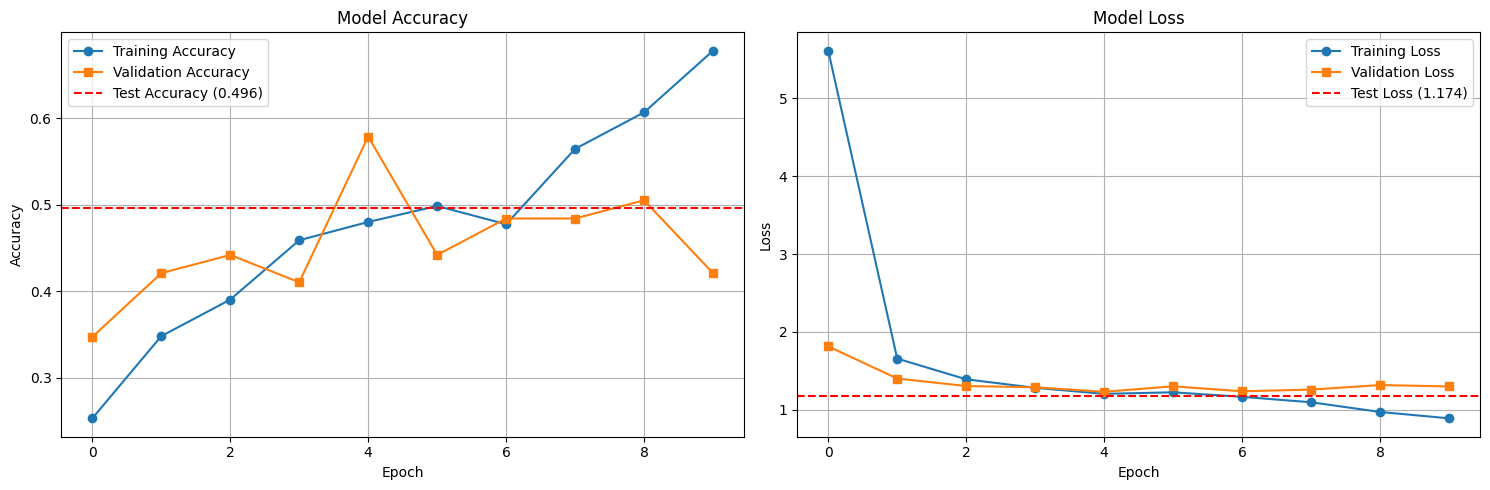

In [44]:
# Plot training history
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot accuracy
axes[0].plot(history.history['accuracy'], label='Training Accuracy', marker='o')
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy', marker='s')
axes[0].axhline(y=test_acc, color='r', linestyle='--', label=f'Test Accuracy ({test_acc:.3f})')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].set_title('Model Accuracy')
axes[0].legend()
axes[0].grid(True)

# Plot loss
axes[1].plot(history.history['loss'], label='Training Loss', marker='o')
axes[1].plot(history.history['val_loss'], label='Validation Loss', marker='s')
axes[1].axhline(y=test_loss, color='r', linestyle='--', label=f'Test Loss ({test_loss:.3f})')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].set_title('Model Loss')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step


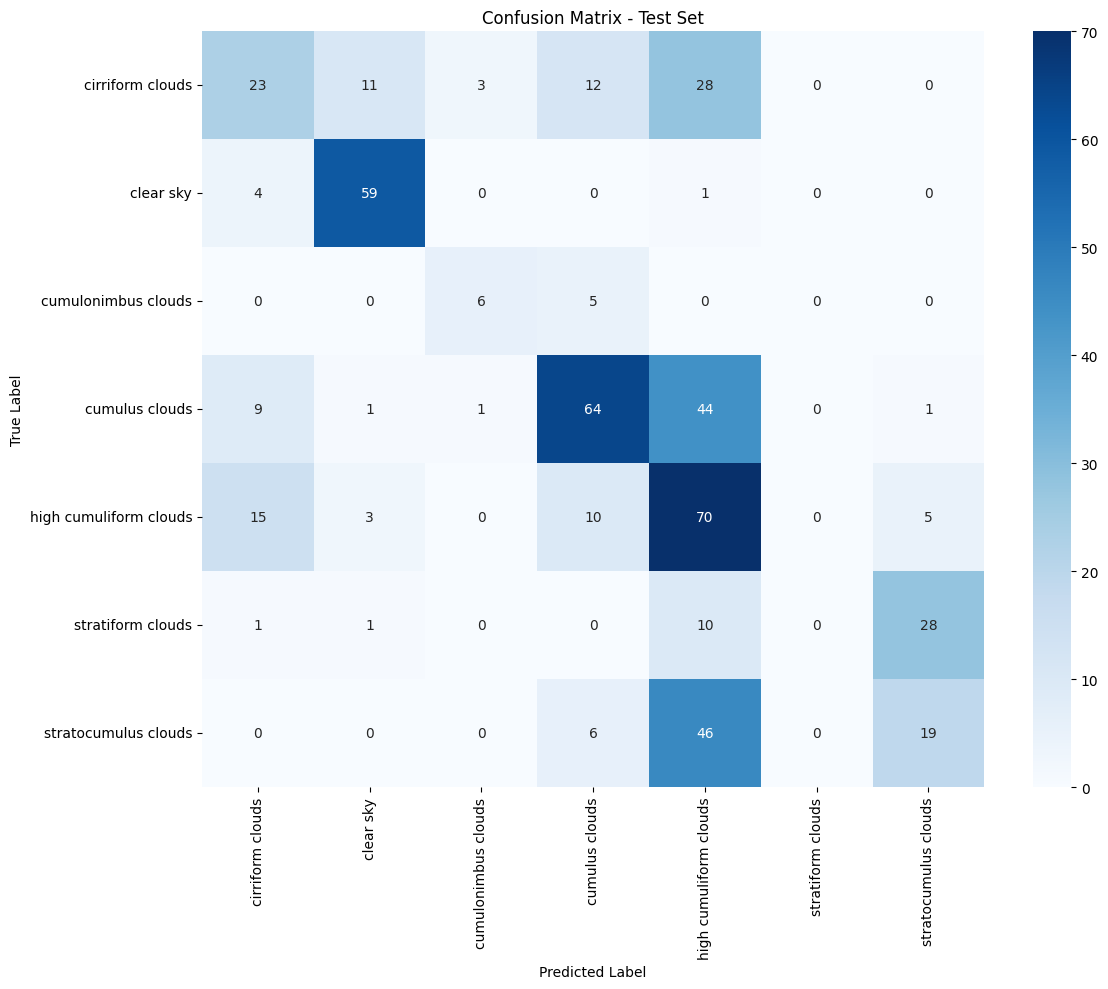


Classification Report:
                        precision    recall  f1-score   support

      cirriform clouds       0.44      0.30      0.36        77
             clear sky       0.79      0.92      0.85        64
   cumulonimbus clouds       0.60      0.55      0.57        11
        cumulus clouds       0.66      0.53      0.59       120
high cumuliform clouds       0.35      0.68      0.46       103
     stratiform clouds       0.00      0.00      0.00        40
  stratocumulus clouds       0.36      0.27      0.31        71

              accuracy                           0.50       486
             macro avg       0.46      0.46      0.45       486
          weighted avg       0.48      0.50      0.47       486



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [45]:
# Generate predictions on test set
test_predictions = model.predict(test_images_array)
test_predicted_classes = np.argmax(test_predictions, axis=1)

# Create confusion matrix
from sklearn.metrics import confusion_matrix, classification_report

try:
    import seaborn as sns
except ImportError:
    print("Seaborn not found. Please install with: pip install seaborn")
    # Fallback to matplotlib if seaborn not available
    sns = None

cm = confusion_matrix(test_labels_array, test_predicted_classes)

# Plot confusion matrix
plt.figure(figsize=(12, 10))
if sns:
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=class_names, yticklabels=class_names)
else:
    # Fallback to matplotlib if seaborn not available
    plt.imshow(cm, interpolation='nearest', cmap='Blues')
    plt.colorbar()
    for i in range(len(class_names)):
        for j in range(len(class_names)):
            plt.text(j, i, str(cm[i, j]), ha='center', va='center')
    plt.xticks(range(len(class_names)), class_names, rotation=45, ha='right')
    plt.yticks(range(len(class_names)), class_names)
plt.title('Confusion Matrix - Test Set')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

# Print classification report
print("\nClassification Report:")
print(classification_report(test_labels_array, test_predicted_classes, 
                            target_names=class_names))


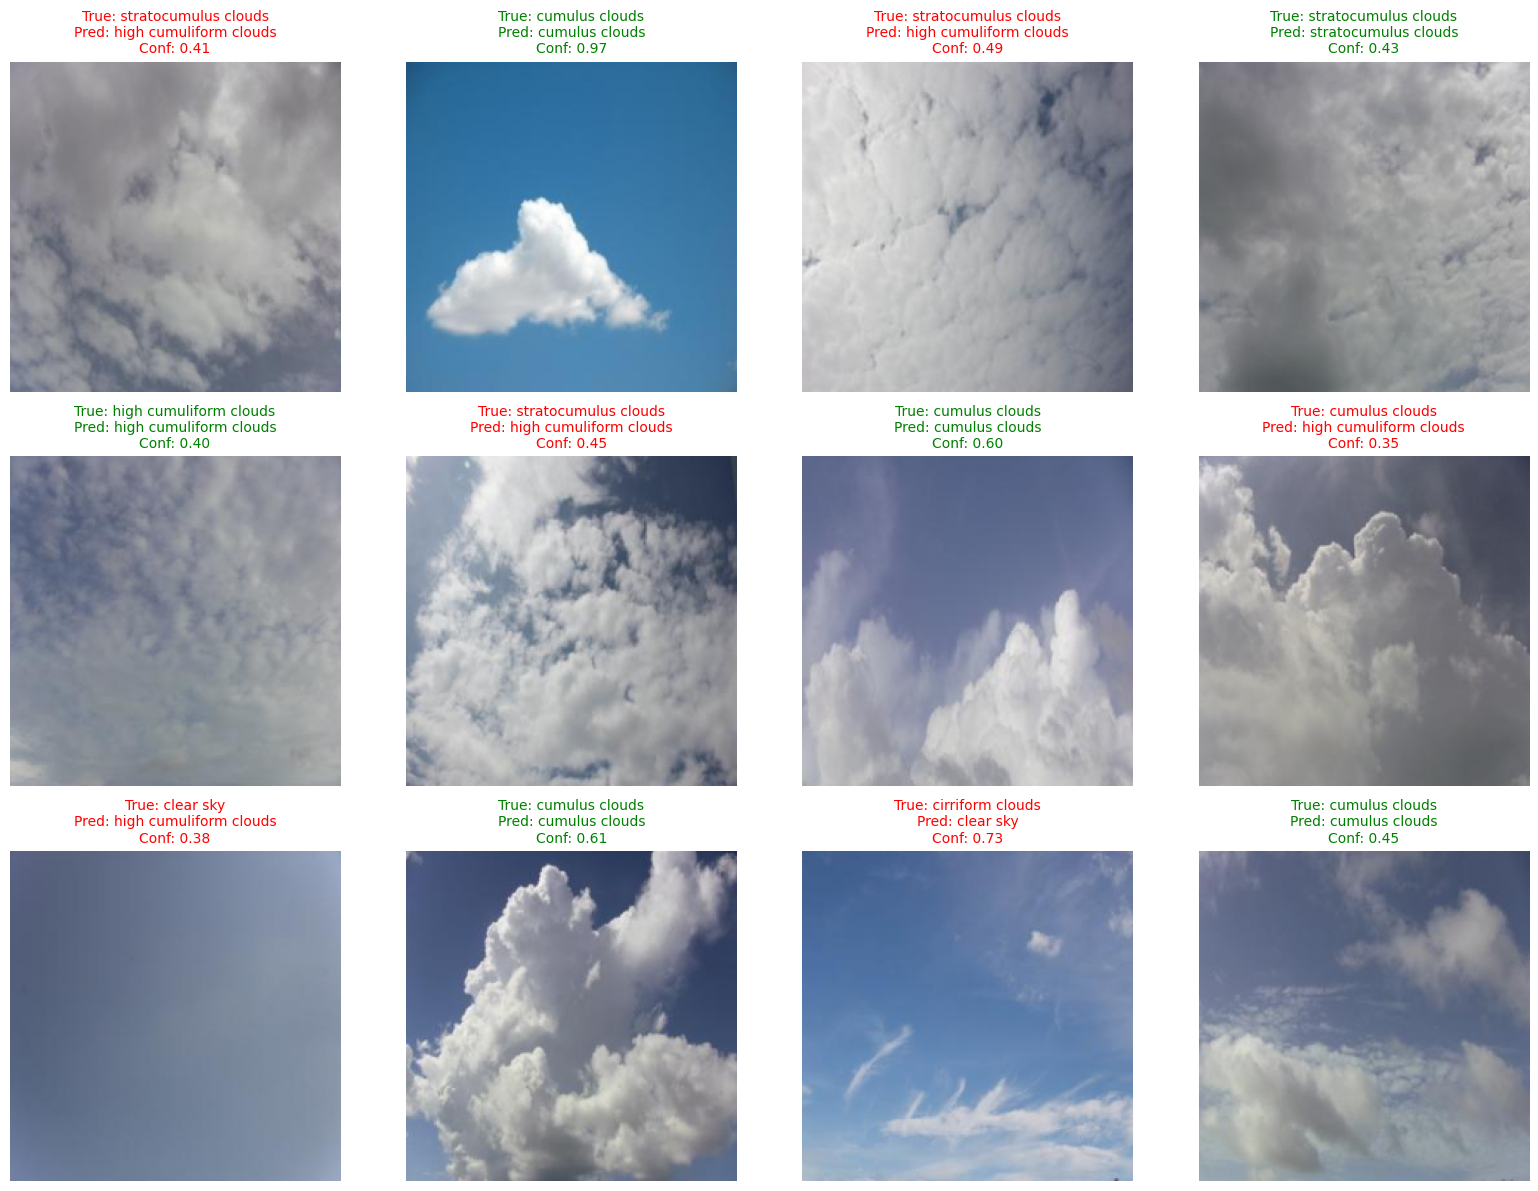

In [46]:
# Visualize some test predictions
fig, axes = plt.subplots(3, 4, figsize=(16, 12))
axes = axes.ravel()

# Select random test samples
np.random.seed(42)
sample_indices = np.random.choice(len(test_images_array), 12, replace=False)

for idx, sample_idx in enumerate(sample_indices):
    img = test_images_array[sample_idx]
    true_label = test_labels_array[sample_idx]
    pred_label = test_predicted_classes[sample_idx]
    confidence = test_predictions[sample_idx][pred_label]
    
    axes[idx].imshow(img)
    axes[idx].axis('off')
    
    # Color: green if correct, red if wrong
    color = 'green' if true_label == pred_label else 'red'
    title = f"True: {class_names[true_label]}\nPred: {class_names[pred_label]}\nConf: {confidence:.2f}"
    axes[idx].set_title(title, color=color, fontsize=10)

plt.tight_layout()
plt.show()


In [47]:
# Display model architecture summary
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │    23,888,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 71,724,887 (273.61 MB)

 Trainable params: 23,908,295 (91.20 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 47,816,592 (182.41 MB)